# Robustness Analysis: Multiplicative vs Additive Errors

This notebook compares the effectiveness of the toggling-frame robustness objective for both multiplicative and additive errors. It's strucuted as follows:
* Imports
* Multiplicative vs Additive Error Comparison for Unitary Smooth Pulse Problem: Here we compare the effect of the toggling frame robustness objective on additive and multiplicative errors without any variational states.
* Adjoint, Toggling, Adjoint + Toggling Comparison: Here we compare the effect of the toggling frame robustness relative to the existing adjoint robustness objective on both additive and multiplicative errors (with variational states)

## Imports and Setup

In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();
Pkg.develop(path="../../QuantumCollocation.jl")
using PiccoloQuantumObjects
using QuantumCollocation
using ForwardDiff
using LinearAlgebra
using Plots
using SparseArrays
using Statistics

  Activating project at `~/Documents/research/pulses/project/notebooks/src`
Precompiling project...
  21572.2 ms  ✓ QuantumCollocation
  1 dependency successfully precompiled in 28 seconds. 560 already precompiled.
   Resolving package versions...
  No Changes to `~/Documents/research/pulses/project/notebooks/src/Project.toml`
  No Changes to `~/Documents/research/pulses/project/notebooks/src/Manifest.toml`


In [4]:
# Problem parameters
T = 100
Δt = 0.2
U_goal = GATES.X
H_drive = PAULIS.X
rob_scale = 1 / 8.0
a_bound = 0.2
dda_bound = 0.1
piccolo_opts = PiccoloOptions(verbose=false)

PiccoloOptions(false, true, ExponentialAction.expv, true, false, nothing, 1.0, false, false, 0.01, 0.01)

## Multiplicative vs Additive Error Comparison for Unitary Smooth Pulse Problem

#### Setup Problem and Solve

In the cell below we get the non-robust and robust trajectories for the Hamiltonian $H=X$ without adding any errors. Later, we will rollout the fidelity for each trajectory for a system subject to an error. 

In [5]:
# setup problems
# multiplicative case
sys = QuantumSystem([H_drive])
prob = UnitarySmoothPulseProblem(sys, U_goal, T, Δt)
solve!(prob, max_iter=50, print_level=5)

    constructing UnitarySmoothPulseProblem...
	using integrator: typeof(UnitaryIntegrator)
	control derivative names: [:da, :dda]


MethodError: MethodError: no method matching length(::Objective{QuantumCollocation.QuantumObjectives.var"#ℓ#25"{Matrix{Float64}, NamedTrajectories.StructNamedTrajectory.NamedTrajectory{Float64, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, Int64}, (:a, :da, :dda, :Δt), NTuple{4, Tuple{Vector{Float64}, Vector{Float64}}}, (:Ũ⃗, :a), Tuple{Vector{Float64}, Vector{Float64}}, (:a,), Tuple{Vector{Float64}}, (:Ũ⃗,), Tuple{Vector{Float64}}, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, UnitRange{Int64}}, NTuple{5, Symbol}, Tuple{Symbol, Symbol, Symbol}, Tuple{Symbol, Symbol}, (), Tuple{}, (), Tuple{}, Tuple{}}, QuantumCollocation.QuantumObjectives.var"#toggle#24", Vector{Vector{Int64}}}, QuantumCollocation.QuantumObjectives.var"#21#27"{QuantumCollocation.QuantumObjectives.var"#ℓ#25"{Matrix{Float64}, NamedTrajectories.StructNamedTrajectory.NamedTrajectory{Float64, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, Int64}, (:a, :da, :dda, :Δt), NTuple{4, Tuple{Vector{Float64}, Vector{Float64}}}, (:Ũ⃗, :a), Tuple{Vector{Float64}, Vector{Float64}}, (:a,), Tuple{Vector{Float64}}, (:Ũ⃗,), Tuple{Vector{Float64}}, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, UnitRange{Int64}}, NTuple{5, Symbol}, Tuple{Symbol, Symbol, Symbol}, Tuple{Symbol, Symbol}, (), Tuple{}, (), Tuple{}, Tuple{}}, QuantumCollocation.QuantumObjectives.var"#toggle#24", Vector{Vector{Int64}}}}, QuantumCollocation.QuantumObjectives.var"#∂²ℓ#29"{QuantumCollocation.QuantumObjectives.var"#∂²ℓ_structure#28"{NamedTrajectories.StructNamedTrajectory.NamedTrajectory{Float64, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, Int64}, (:a, :da, :dda, :Δt), NTuple{4, Tuple{Vector{Float64}, Vector{Float64}}}, (:Ũ⃗, :a), Tuple{Vector{Float64}, Vector{Float64}}, (:a,), Tuple{Vector{Float64}}, (:Ũ⃗,), Tuple{Vector{Float64}}, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, UnitRange{Int64}}, NTuple{5, Symbol}, Tuple{Symbol, Symbol, Symbol}, Tuple{Symbol, Symbol}, (), Tuple{}, (), Tuple{}, Tuple{}}, Vector{Vector{Int64}}}, QuantumCollocation.QuantumObjectives.var"#ℓ#25"{Matrix{Float64}, NamedTrajectories.StructNamedTrajectory.NamedTrajectory{Float64, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, Int64}, (:a, :da, :dda, :Δt), NTuple{4, Tuple{Vector{Float64}, Vector{Float64}}}, (:Ũ⃗, :a), Tuple{Vector{Float64}, Vector{Float64}}, (:a,), Tuple{Vector{Float64}}, (:Ũ⃗,), Tuple{Vector{Float64}}, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, UnitRange{Int64}}, NTuple{5, Symbol}, Tuple{Symbol, Symbol, Symbol}, Tuple{Symbol, Symbol}, (), Tuple{}, (), Tuple{}, Tuple{}}, QuantumCollocation.QuantumObjectives.var"#toggle#24", Vector{Vector{Int64}}}}, QuantumCollocation.QuantumObjectives.var"#∂²ℓ_structure#28"{NamedTrajectories.StructNamedTrajectory.NamedTrajectory{Float64, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, Int64}, (:a, :da, :dda, :Δt), NTuple{4, Tuple{Vector{Float64}, Vector{Float64}}}, (:Ũ⃗, :a), Tuple{Vector{Float64}, Vector{Float64}}, (:a,), Tuple{Vector{Float64}}, (:Ũ⃗,), Tuple{Vector{Float64}}, (:Ũ⃗, :a, :da, :dda, :Δt), NTuple{5, UnitRange{Int64}}, NTuple{5, Symbol}, Tuple{Symbol, Symbol, Symbol}, Tuple{Symbol, Symbol}, (), Tuple{}, (), Tuple{}, Tuple{}}, Vector{Vector{Int64}}}})
The function `length` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  length(!Matched::MutableArithmetics.Zero)
   @ MutableArithmetics ~/.julia/packages/MutableArithmetics/tNSBd/src/rewrite.jl:119
  length(!Matched::MathOptInterface.Utilities.IndexMap)
   @ MathOptInterface ~/.julia/packages/MathOptInterface/ugDMh/src/Utilities/copy/index_map.jl:102
  length(!Matched::Base.MethodSpecializations)
   @ Base reflection.jl:1317
  ...


In [ ]:
rob_sys = QuantumSystem([H_drive])
sweep_rob_loss_λ = [i for i in 0.0:.1:10]
for λ in sweep_rob_loss_λ
    rob_prob = UnitarySmoothPulseProblem(rob_sys, U_goal, T, Δt; 
                                    H_err = PAULIS.X,
                                    activate_rob_loss=λ, 
                                    a_bound = a_bound,
                                    dda_bound = dda_bound)
    solve!(rob_prob, max_iter=50, print_level=5)
    
end

#### Calculate Fidelities

Here, we rollout the fidelity for each trajectory.

In [21]:
mult_err_fids = Float64[]
additive_err_fids = Float64[]
mult_rob_fids = Float64[]
additive_rob_fids = Float64[]

error_magnitudes = [x for x in range(-2*π/T, stop=2*π/T, length=100)]

# calculate fidelities
for ε in error_magnitudes
    println("\nError magnitude ε = $ε")

    # mult case
    H_drive_mult(ε) = (1 + ε) * H_drives
    ∂ₑHₘ = H_drive_mult(ε)
    mult_err_sys = QuantumSystem(H_drive_mult(ε))
    mult_err_fidelity = unitary_rollout_fidelity(prob.trajectory, mult_err_sys)
    push!(mult_err_fids, mult_err_fidelity)
    mult_rob_fidelity = unitary_rollout_fidelity(rob_prob.trajectory, mult_err_sys)
    push!(mult_rob_fids, mult_rob_fidelity)

    # additive case
    H_drift(ε) = ε * (PAULIS.Z)
    H_drive_add = H_drives
    add_err_sys = QuantumSystem(H_drift(ε), H_drive_add)
    add_err_fidelity = unitary_rollout_fidelity(prob.trajectory, add_err_sys)
    push!(additive_err_fids, add_err_fidelity)
    add_rob_fidelity = unitary_rollout_fidelity(rob_prob.trajectory, add_err_sys)
    push!(additive_rob_fids, add_rob_fidelity)
end


Error magnitude ε = -0.06283185307179587

Error magnitude ε = -0.06156252270670908

Error magnitude ε = -0.060293192341622295

Error magnitude ε = -0.05902386197653551

Error magnitude ε = -0.05775453161144873

Error magnitude ε = -0.056485201246361944

Error magnitude ε = -0.05521587088127516

Error magnitude ε = -0.05394654051618837

Error magnitude ε = -0.052677210151101585

Error magnitude ε = -0.0514078797860148

Error magnitude ε = -0.05013854942092802

Error magnitude ε = -0.04886921905584123

Error magnitude ε = -0.04759988869075445

Error magnitude ε = -0.04633055832566766

Error magnitude ε = -0.045061227960580874

Error magnitude ε = -0.04379189759549409

Error magnitude ε = -0.0425225672304073

Error magnitude ε = -0.04125323686532052

Error magnitude ε = -0.039983906500233736

Error magnitude ε = -0.03871457613514695

Error magnitude ε = -0.037445245770060163

Error magnitude ε = -0.03617591540497338

Error magnitude ε = -0.03490658503988659

Error magnitude ε = -0.033637

Below we plot the log (base 10) of the fidelity (NOT the infidelity) for both types of errors. 

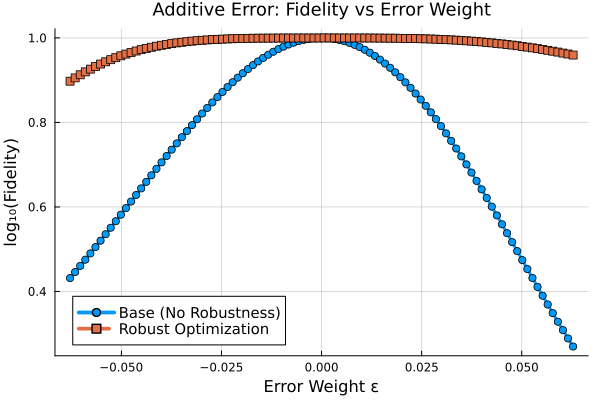

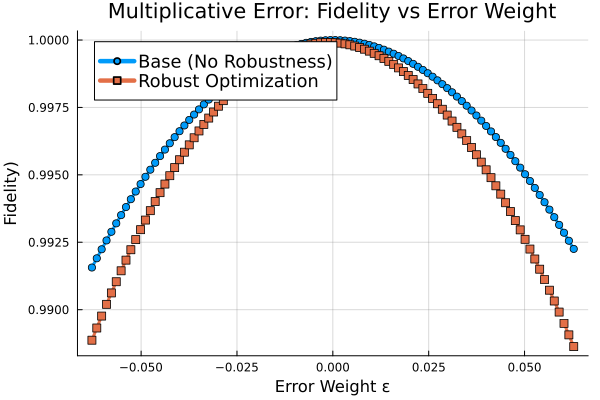


Additive Error Results:
Average base fidelity: 0.7445
Average robust fidelity: 0.9841

Multiplicative Error Results:
Average base fidelity: 0.9972
Average robust fidelity: 0.9961

 Results Table:
Error ε  | Add Err | Add Rob | Mult Err| Mult Rob %
---------------------------------------------------------------------------
-0.0628 |   0.4316 |   0.8976 |    0.9916 |   0.9889
-0.0616 |    0.446 |   0.9054 |    0.9919 |   0.9893
-0.0603 |   0.4605 |   0.9128 |    0.9922 |   0.9898
 -0.059 |   0.4752 |   0.9197 |    0.9926 |   0.9902
-0.0578 |     0.49 |   0.9262 |    0.9929 |   0.9906
-0.0565 |    0.505 |   0.9324 |    0.9932 |    0.991
-0.0552 |   0.5202 |   0.9381 |    0.9935 |   0.9914
-0.0539 |   0.5354 |   0.9435 |    0.9938 |   0.9918
-0.0527 |   0.5507 |   0.9486 |    0.9941 |   0.9922
-0.0514 |   0.5662 |   0.9533 |    0.9944 |   0.9926
-0.0501 |   0.5817 |   0.9577 |    0.9947 |    0.993
-0.0489 |   0.5972 |   0.9617 |    0.9949 |   0.9933
-0.0476 |   0.6127 |   0.9655 |    0.99

In [22]:
# Plot 1: Additive Error - Base vs Robust Fidelity
p1 = plot(error_magnitudes, additive_err_fids, 
         label="Base (No Robustness)", 
         marker=:circle, markersize=4, linewidth=3,
         xlabel="Error Weight ε", 
         ylabel="Fidelity",
         title="Additive Error: Fidelity vs Error Weight",
         legendfontsize=10, titlefontsize=12,
         grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3
         )

plot!(p1, error_magnitudes, additive_rob_fids, 
      label="Robust Optimization", 
      marker=:square, markersize=4, linewidth=3,
      linestyle=:dash)

# Plot 2: Multiplicative Error - Base vs Robust Fidelity
p2 = plot(error_magnitudes, mult_err_fids, 
         label="Base (No Robustness)", 
         marker=:circle, markersize=4, linewidth=3,
         xlabel="Error Weight ε", 
         ylabel="Fidelity",
         title="Multiplicative Error: Fidelity vs Error Weight",
         legendfontsize=12, titlefontsize=14,
         grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3
         )

plot!(p2, error_magnitudes, mult_rob_fids, 
      label="Robust Optimization", 
      marker=:square, markersize=4, linewidth=3,
      linestyle=:dash)

display(p1)
display(p2)

# # Summary statistics
println("\nAdditive Error Results:")
println("Average base fidelity: $(round(mean(additive_err_fids), digits=4))")
println("Average robust fidelity: $(round(mean(additive_rob_fids), digits=4))")

println("\nMultiplicative Error Results:")
println("Average base fidelity: $(round(mean(mult_err_fids), digits=4))")
println("Average robust fidelity: $(round(mean(mult_rob_fids), digits=4))")

println("\n Results Table:")
println("Error ε  | Add Err | Add Rob | Mult Err| Mult Rob %")
println("-" ^ 75)
for i in 1:length(error_magnitudes)
    println("$(lpad(round(error_magnitudes[i], digits=4), 7)) | $(lpad(round(additive_err_fids[i], digits=4), 8)) | $(lpad(round(additive_rob_fids[i], digits=4), 8)) | $(lpad(round(mult_err_fids[i], digits=4), 9)) | $(lpad(round(mult_rob_fids[i], digits=4), 8))")
end


## Adjoint, Toggling, Adjoint+Toggling Comparison

In this section, we setup and solve four problems:

1. Adjoint robustness but without the toggle-frame robustness objective (i.e. base case):
    1. Additive error model 
    2. Multiplicative error model
2. With the adjoint and robustness objective 
    1. Additive error model
    2. Multiplicative error model

### Base Case (without toggle-frame robustness objective)

Setup problem to test the performance of the objective using only adjoint robustness (without toggling objective)

In [44]:
# Problem parameters
T = 100
Δt = 0.2
U_goal = GATES.H
H_drives = [PAULIS.X, PAULIS.Y]
∂ₑHₘ = [PAULIS.X, PAULIS.Y]
rob_scale = 1 / 8.0
a_bound = 0.2
dda_bound = 0.1
piccolo_opts = PiccoloOptions(verbose=false)

# setup problems
# mult case
varsys_mult = VariationalQuantumSystem(H_drives, ∂ₑHₘ)

mult_base_prob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale, rob_scale],
    robust_times=[[T], [T]],
    piccolo_options=piccolo_opts
)
# solve mult problems
solve!(mult_base_prob, max_iter=50, print_level=0)

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: initial value of Ũ⃗ᵥ2
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


In [28]:
# additive case
H_drift_add = PAULIS.Z
∂ₑHₐ = PAULIS.Z
varsys_add = VariationalQuantumSystem(H_drift_add, H_drives, [∂ₑHₐ])

# setup base case
add_base_prob = UnitaryVariationalProblem(
    varsys_add, U_goal, T, Δt;
    variational_scales=[rob_scale],
    piccolo_options=piccolo_opts
)

solve!(add_base_prob, max_iter=50, print_level=0)

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


### Robust Case

Setup problem to test performance when using both adjoint and toggling objectives

In [45]:
# additive case
H_drive_add = H_drives
add_rob_prob = UnitaryVariationalProblem(
        varsys_add, U_goal, T, Δt;
        variational_scales=[rob_scale],
        H_err = PAULIS.Z,
        activate_rob_loss=true,
        piccolo_options=piccolo_opts
    )

solve!(add_rob_prob, max_iter=50, print_level=0)

# multiplicative case
mult_rob_prob = UnitaryVariationalProblem(
    varsys_mult, U_goal, T, Δt;
    variational_scales=[rob_scale, rob_scale],
    robust_times=[[T], [T]],
    H_err = PAULIS.Z,
    activate_rob_loss=true,
    piccolo_options=piccolo_opts
)

# Multiplicative robust case
solve!(mult_rob_prob, max_iter=50, print_level=0)

    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt
    initializing optimizer...
        applying constraint: timesteps all equal constraint
        applying constraint: initial value of Ũ⃗
        applying constraint: initial value of a
        applying constraint: initial value of Ũ⃗ᵥ1
        applying constraint: initial value of Ũ⃗ᵥ2
        applying constraint: final value of a
        applying constraint: bounds on a
        applying constraint: bounds on da
        applying constraint: bounds on dda
        applying constraint: bounds on Δt


#### Calculate Infidelity
Here we calculate the INFIDELITY (NOT the fidelity) for all four problems as previously specified.

In [59]:
mult_robust_fids = Float64[]
additive_robust_fids = Float64[]
mult_base_fids = Float64[]
additive_base_fids = Float64[]

error_magnitudes = [x for x in range(-2π/T, stop=2π/T, length=50)]

# calculate fidelities
for ε in error_magnitudes
    println("\nError magnitude ε = $ε")

    # mult case
    H_drive_mult(ε) = (1 + ε) * [PAULIS.X, PAULIS.Z]
    varsys_mult_err = VariationalQuantumSystem(H_drive_mult(ε), ∂ₑHₘ)

    # mult-base case
    mult_base_fidelity = unitary_rollout_fidelity(mult_base_prob.trajectory, varsys_mult_err)
    push!(mult_base_fids, mult_base_fidelity)
    
    # mult-robust case
    mult_rob_fidelity = unitary_rollout_fidelity(mult_rob_prob.trajectory, varsys_mult_err)
    push!(mult_robust_fids, mult_rob_fidelity)

    # additive base case
    H_drift(ε) = ε * PAULIS.I
    varsys_add_err = VariationalQuantumSystem(H_drift(ε), H_drive_add, [∂ₑHₐ])

    add_base_fidelity = unitary_rollout_fidelity(add_base_prob.trajectory, varsys_add_err)
    push!(additive_base_fids, add_base_fidelity)

    # Additive robust case
    add_rob_fidelity = unitary_rollout_fidelity(add_rob_prob.trajectory, varsys_add_err)
    push!(additive_robust_fids, add_rob_fidelity)
end


Error magnitude ε = -0.06283185307179587

Error magnitude ε = -0.060267287640293994

Error magnitude ε = -0.05770272220879212

Error magnitude ε = -0.055138156777290254

Error magnitude ε = -0.05257359134578838

Error magnitude ε = -0.050009025914286506

Error magnitude ε = -0.04744446048278463

Error magnitude ε = -0.044879895051282766

Error magnitude ε = -0.04231532961978089

Error magnitude ε = -0.03975076418827902

Error magnitude ε = -0.037186198756777145

Error magnitude ε = -0.03462163332527527

Error magnitude ε = -0.032057067893773404

Error magnitude ε = -0.02949250246227153

Error magnitude ε = -0.026927937030769657

Error magnitude ε = -0.024363371599267786

Error magnitude ε = -0.021798806167765913

Error magnitude ε = -0.019234240736264042

Error magnitude ε = -0.01666967530476217

Error magnitude ε = -0.014105109873260297

Error magnitude ε = -0.011540544441758425

Error magnitude ε = -0.008975979010256553

Error magnitude ε = -0.006411413578754681

Error magnitude ε =

#### Plotting

We have three plots 
1. Plots the fidelity of both the base and robust cases for additive error with respect to the weight of the error
2. Plots the fidelity of both the base and robust cases for multiplicative error with respect to the weight of the error
3. Compares the relative improvement in fidelity for the additive v multiplcative error when including robustness objective 

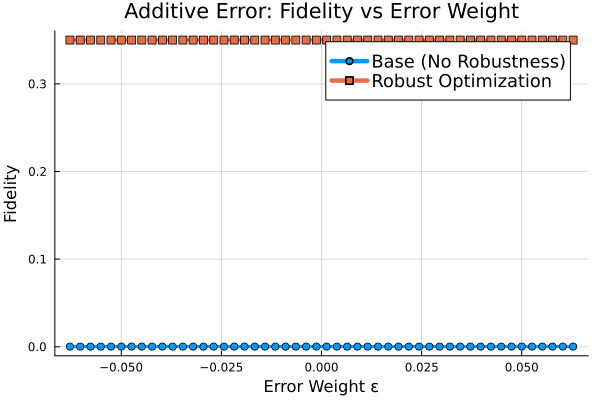

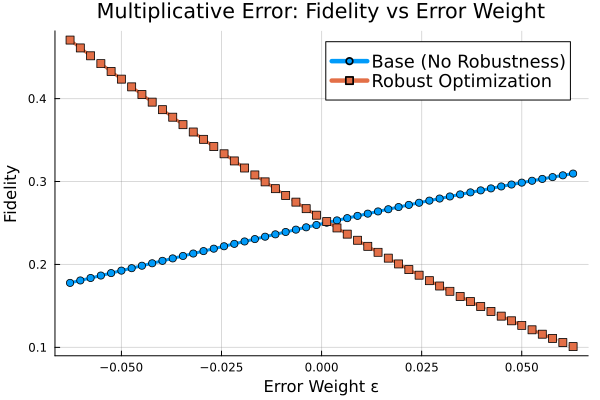

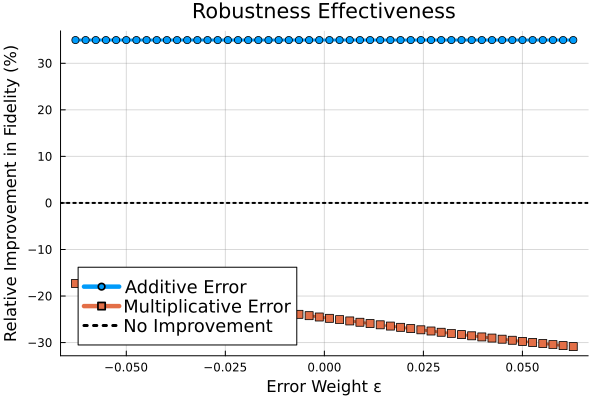


Additive Error Results:
Average base infidelity: 0.0002
Average robust infidelity: 0.35
Average improvement: 34.99%
Max improvement: 34.99%

Multiplicative Error Results:
Average base infidelity: 0.2471
Average robust infidelity: 0.2662
Average improvement: -24.45%
Max improvement: -17.3%

Comparison:
 Additive errors benefit more from robust optimization
  Difference: 59.43% better

 Results Table:
Error ε  | Add Base | Add Rob  | Add Imp% | Mult Base| Mult Rob | Mult Imp%
---------------------------------------------------------------------------
-0.0628 |   0.0002 |     0.35 |     35.0 |    0.1777 |   0.4706 |     -17.3
-0.0603 |   0.0002 |     0.35 |     35.0 |    0.1807 |   0.4611 |     -17.6
-0.0577 |   0.0002 |     0.35 |     35.0 |    0.1837 |   0.4516 |     -17.9
-0.0551 |   0.0002 |     0.35 |     35.0 |    0.1866 |   0.4422 |     -18.2
-0.0526 |   0.0002 |     0.35 |     35.0 |    0.1896 |   0.4328 |     -18.5
  -0.05 |   0.0002 |     0.35 |     35.0 |    0.1925 |   0.4235 

In [62]:
# Plot 1: Additive Error - Base vs Robust Fidelity
p1 = plot(error_magnitudes, additive_base_fids, 
         label="Base (No Robustness)", 
         marker=:circle, markersize=4, linewidth=3,
         xlabel="Error Weight ε", 
         ylabel="Fidelity",
         title="Additive Error: Fidelity vs Error Weight",
         legendfontsize=12, titlefontsize=14,
         grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3
         )

plot!(p1, error_magnitudes, additive_robust_fids, 
      label="Robust Optimization", 
      marker=:square, markersize=4, linewidth=3,
      linestyle=:dash)

display(p1)

# Plot 2: Multiplicative Error - Base vs Robust Fidelity
p2 = plot(error_magnitudes, mult_base_fids, 
         label="Base (No Robustness)", 
         marker=:circle, markersize=4, linewidth=3,
         xlabel="Error Weight ε", 
         ylabel="Fidelity",
         title="Multiplicative Error: Fidelity vs Error Weight",
         legendfontsize=12, titlefontsize=14,
         grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3
         )

plot!(p2, error_magnitudes, mult_robust_fids,
      label="Robust Optimization", 
      marker=:square, markersize=4, linewidth=3,
      linestyle=:dash)

display(p2)

# Calculate relative improvements
additive_improvements = [(additive_robust_fids[i] - additive_base_fids[i]) * 100 
                        for i in 1:length(error_magnitudes)]

mult_improvements = [(mult_robust_fids[i]) - mult_base_fids[i] * 100 
                    for i in 1:length(error_magnitudes)]

# Plot 3: Relative Improvement Comparison
p3 = plot(error_magnitudes, additive_improvements, 
         label="Additive Error", 
         marker=:circle, markersize=4, linewidth=3,
         xlabel="Error Weight ε", 
         ylabel="Relative Improvement in Fidelity (%)",
         title="Robustness Effectiveness",
         legendfontsize=12, titlefontsize=14,
         grid=true, gridwidth=1, gridcolor=:gray, gridalpha=0.3)

plot!(p3, error_magnitudes, mult_improvements, 
      label="Multiplicative Error", 
      marker=:square, markersize=4, linewidth=3,
      linestyle=:dash)

# Add horizontal line at 0% improvement
hline!(p3, [0], linestyle=:dot, linewidth=2, color=:black, label="No Improvement")

display(p3)


# Summary statistics
println("\nAdditive Error Results:")
println("Average base infidelity: $(round(mean(additive_base_fids), digits=4))")
println("Average robust infidelity: $(round(mean(additive_robust_fids), digits=4))")
println("Average improvement: $(round(mean(additive_improvements), digits=2))%")
println("Max improvement: $(round(maximum(additive_improvements), digits=2))%")

println("\nMultiplicative Error Results:")
println("Average base infidelity: $(round(mean(mult_base_fids), digits=4))")
println("Average robust infidelity: $(round(mean(mult_robust_fids), digits=4))")
println("Average improvement: $(round(mean(mult_improvements), digits=2))%")
println("Max improvement: $(round(maximum(mult_improvements), digits=2))%")

# Which error type benefits more from robustness?
avg_add_improvement = mean(additive_improvements)
avg_mult_improvement = mean(mult_improvements)

println("\nComparison:")
if avg_add_improvement > avg_mult_improvement
    println(" Additive errors benefit more from robust optimization")
    println("  Difference: $(round(avg_add_improvement - avg_mult_improvement, digits=2))% better")
else
    println(" Multiplicative errors benefit more from robust optimization")
    println("  Difference: $(round(avg_mult_improvement - avg_add_improvement, digits=2))% better")
end

println("\n Results Table:")
println("Error ε  | Add Base | Add Rob  | Add Imp% | Mult Base| Mult Rob | Mult Imp%")
println("-" ^ 75)
for i in 1:length(error_magnitudes)
    println("$(lpad(round(error_magnitudes[i], digits=4), 7)) | $(lpad(round(additive_base_fids[i], digits=4), 8)) | $(lpad(round(additive_robust_fids[i], digits=4), 8)) | $(lpad(round(additive_improvements[i], digits=1), 8)) | $(lpad(round(mult_base_fids[i], digits=4), 9)) | $(lpad(round(mult_robust_fids[i], digits=4), 8)) | $(lpad(round(mult_improvements[i], digits=1), 9))")
end

# plot(add_rob_prob.trajectory, [:Ũ⃗, :a])